# Exercise on missing data imputation

In [149]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## A) Load and frame data

**Data description**: 	A driver uses an app to track GPS coordinates as he drives to work and back each day. The app collects the location and elevation data. Data for about 200 trips are summarized in this data set.
You may see more info [here](https://openmv.net/info/travel-times).


1. Read the csv file from https://openmv.net/file/travel-times.csv.
2. Format each column using appropriate types.
3. Merge the first two columns to have a datetime index.
4. Encode all categorical fields into integers.
5. Identify columns with missing data. Print a table showing the count and ratio of missing values for each column.
6. We will not need the column `Comments` for the remainder of the notebook, so you may drop it at you convenience.

In [150]:
# TODO your code here
# 1
data = pd.read_csv('https://openmv.net/file/travel-times.csv')

# 2
data["Date"] = pd.to_datetime(data["Date"])
data["StartTime"] = pd.to_datetime(data["StartTime"])
data["DayOfWeek"] = data["DayOfWeek"].astype("category")
data["GoingTo"] = data["GoingTo"].astype(str)
data["Distance"] = data["Distance"].astype(float)
data["MaxSpeed"] = data["MaxSpeed"].astype(float)
data["AvgSpeed"] = data["AvgSpeed"].astype(float)
data["AvgMovingSpeed"] = data["AvgMovingSpeed"].astype(float)
data["FuelEconomy"] = data["FuelEconomy"].replace('-', np.nan).astype(float)
data["TotalTime"] = data["TotalTime"].astype(float)
data["MovingTime"] = data["MovingTime"].astype(float)
data["Take407All"] = data["Take407All"].astype("category")
data["Comments"] = data["Comments"].astype(str)

# 3
data['Date_StartTime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['StartTime'].astype(str))
data.set_index('Date_StartTime', inplace=True)
data.drop(['Date', 'StartTime'], axis=1, inplace=True)

# 4
day_of_week_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
data['DayOfWeek'] = data['DayOfWeek'].map(day_of_week_map)
data['DayOfWeek'] = data['DayOfWeek'].astype('int32')
encoder = LabelEncoder()
categorical_columns = ["GoingTo", "Take407All"]
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])

# 5
missing_values_count = data.isna().sum()
missing_values_ratio = missing_values_count / len(data)
missing_data_table = pd.DataFrame({
    "Missing Values Count": missing_values_count,
    "Missing Values Ratio": missing_values_ratio
})

# 6
data = data.drop("Comments", axis=1)

# print(missing_data_table)
data.head()


,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All
Date_StartTime,,,,,,,,,,
2012-01-06 16:37:00-06:00,4,1,51.29,127.4,78.3,84.8,NaN,39.3,36.3,0
2012-01-06 08:20:00-06:00,4,0,51.63,130.3,81.8,88.9,NaN,37.9,34.9,0
2012-01-04 16:17:00-06:00,2,1,51.27,127.4,82.0,85.8,NaN,37.5,35.9,0
2012-01-04 07:53:00-06:00,2,0,49.17,132.3,74.2,82.9,NaN,39.8,35.6,0
2012-01-03 18:57:00-06:00,1,1,51.15,136.2,83.4,88.1,NaN,36.8,34.8,0


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2012-01-06 16:37:00-06:00 to 2011-07-11 16:56:00-06:00
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DayOfWeek       205 non-null    int32  
 1   GoingTo         205 non-null    int64  
 2   Distance        205 non-null    float64
 3   MaxSpeed        205 non-null    float64
 4   AvgSpeed        205 non-null    float64
 5   AvgMovingSpeed  205 non-null    float64
 6   FuelEconomy     186 non-null    float64
 7   TotalTime       205 non-null    float64
 8   MovingTime      205 non-null    float64
 9   Take407All      205 non-null    int64  
dtypes: float64(7), int32(1), int64(2)
memory usage: 16.8 KB


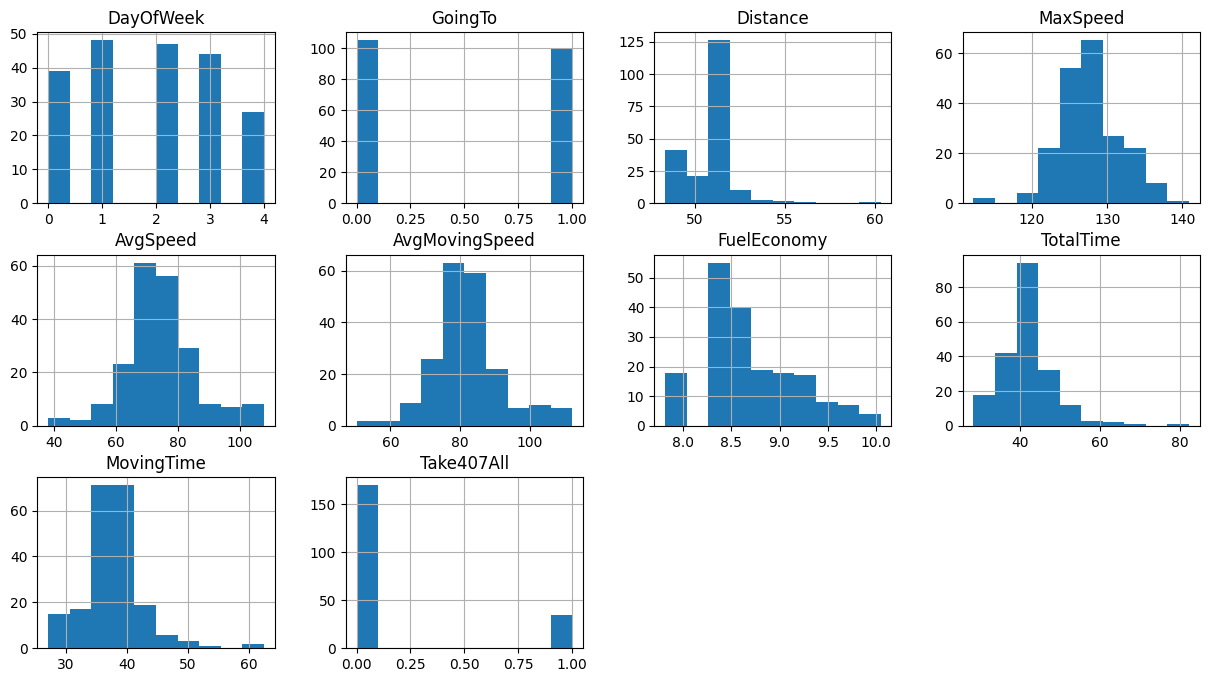

In [152]:
data.hist(figsize=(15,8), layout=(3, 4));

### Count and ratio of missing samples on each column

In [153]:
# TODO your code here
missing_values_count = data.isna().sum()
missing_values_ratio = missing_values_count / len(data)
missing_data_table = pd.DataFrame({
    "Missing Values Count": missing_values_count,
    "Missing Values Ratio": missing_values_ratio
})
missing_data_table

,Missing Values Count,Missing Values Ratio
DayOfWeek,0,0.000000
GoingTo,0,0.000000
Distance,0,0.000000
MaxSpeed,0,0.000000
AvgSpeed,0,0.000000
AvgMovingSpeed,0,0.000000
FuelEconomy,19,0.092683
TotalTime,0,0.000000
MovingTime,0,0.000000
Take407All,0,0.000000


## B) Is the missingness MCAR?

When we have only one variable with missing values (here `FuelEconomy`), one way of checking for MCAR is to separate the rows in two sets depending on wether `FuelEconomy` was observed or missing. The we apply a statistical test to check if each variable has the same distribution in both sets.

1. Create a NA mask based on the missingness in the column `FuelEconomy`.
2. Split the data in `data_miss` and `data_obs` based on this mask[
3. For each column, compare the distributions in both sets using a statistical test ([like Student's t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind) if you can assume normal distribution, or[ Mann-Whitney U](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu) for a non-parametric option). 
    - Tip: you have functions to calculate these statistics and their associated p-values in the package `scipy.stats`.



If the test shows no significant difference between samples in both sets, you may more comfortably accept an MCAR hypothesis. Conversely, a variable bearing significant difference is likely linked to the missingness mechanism, motivating us to move to a conditional MAR hypothesis.


In [154]:
# TODO your code here
na_mask = data["FuelEconomy"].isna()
data_miss = data[na_mask]
data_obs = data[~na_mask]

In [155]:
# TODO your code here
# Apply the test
import pandas as pd
from scipy.stats import mannwhitneyu

result_df = pd.DataFrame(columns=["Variable", "Statistic", "p-value"])

for column in data.columns:
    if column != "FuelEconomy":
        statistic, p_value = mannwhitneyu(data_miss[column], data_obs[column], alternative="two-sided")
        row = pd.DataFrame({"Variable": [column], "Statistic": [statistic], "p-value": [p_value]})
        result_df = pd.concat([result_df, row], ignore_index=True)

result_df







,Variable,Statistic,p-value
0,DayOfWeek,1479.5,0.233387
1,GoingTo,1944.5,0.406525
2,Distance,2278.5,0.038005
3,MaxSpeed,1830.5,0.798103
4,AvgSpeed,1830.5,0.798117
5,AvgMovingSpeed,2052.0,0.248047
6,TotalTime,1739.0,0.911095
7,MovingTime,1540.0,0.357748
8,Take407All,1742.0,0.878696


**QUESTION: What do you conclude from the comparison of `data_miss` and `data_obs`?**

>*We can see that all variable(without distance)'s p-value is big which prove that there is only Distance which has correlation between missing values and normal values.*

## C) MAR dependencies

At 95% CI, you have observed a difference in the distribution of one of the variables, following the missingnes of `FuelEconomy`. 
Another form of seeing how variables interfere in the missingness pattern is to compute the correlation between them and the `na_mask`.

<Axes: >

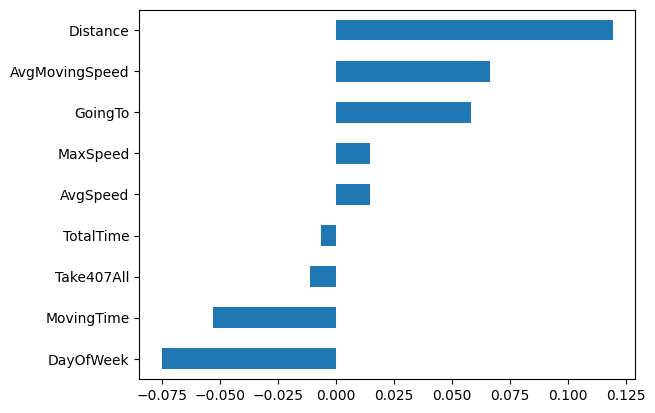

In [156]:
(data.drop('FuelEconomy', axis=1)
 .corrwith(na_mask, method='kendall')
 .sort_values().plot(kind='barh')
 )

**TODO** Pandas's correlation functions do not output p-values.  In the next cell, recompute the correlations using scipy so that you can see p-values. We'll give preference to [Kendal-Tau correlation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html) as it is non-parametric.


In [157]:
# TODO your code here

from scipy.stats import kendalltau

correlations_with_pvalues = {}
for column in data.columns:
    if column == 'FuelEconomy':
        continue
    correlation, p_value = kendalltau(data[column], na_mask)
    correlations_with_pvalues[column] = {'statistic': correlation, 'pvalue': p_value}

correlations_df = pd.DataFrame(correlations_with_pvalues).T
correlations_df.sort_values('statistic', inplace=True,ascending=False)

correlations_df




,statistic,pvalue
Distance,0.119380,0.037818
AvgMovingSpeed,0.066435,0.247216
GoingTo,0.058277,0.405201
MaxSpeed,0.014831,0.796536
AvgSpeed,0.014795,0.796549
TotalTime,-0.006535,0.909485
Take407All,-0.010904,0.876240
MovingTime,-0.053014,0.356687
DayOfWeek,-0.074930,0.232574



**Question: are there any other variables significantly correlated with the missingness in `FuelEconomy`?** 

>*Same as the precedent one, only distance's pvalue is smaller than 0.05 which has a significantly different.*

## D) Simple imputer

We have established missingness to be MAR. A simple iputation method using a constant is thus not the most recommended method. For the sake of the exercise, in this section you will use [`sklearn`'s `SimpleImputer`](https://scikit-learn.org/stable/modules/impute.html#univariate-feature-imputation) to impute with the median. Keep the output imputed data in a separate dataframe.

In [158]:
# TODO your code here
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputed_values = imputer.fit_transform(data.values)
# NOTE sklearn returns a numpy array. You should reformat its output as a dataframe with the same index and columns as before.
data_simp = pd.DataFrame(
    # TODO complete the line bellow
    imputed_values,
    index=data.index,
    columns=data.columns
)
data_simp['FuelEconomy']

Date_StartTime
2012-01-06 16:37:00-06:00    8.52
2012-01-06 08:20:00-06:00    8.52
2012-01-04 16:17:00-06:00    8.52
2012-01-04 07:53:00-06:00    8.52
2012-01-03 18:57:00-06:00    8.52
                             ... 
2011-07-18 08:09:00-06:00    7.89
2011-07-14 08:03:00-06:00    7.89
2011-07-13 17:08:00-06:00    8.52
2011-07-12 17:51:00-06:00    8.52
2011-07-11 16:56:00-06:00    8.52
Name: FuelEconomy, Length: 205, dtype: float64

Observe the effect of median imputation in the relationship between `FuelEconomy` and `Distance`:

<Axes: xlabel='Distance', ylabel='FuelEconomy'>

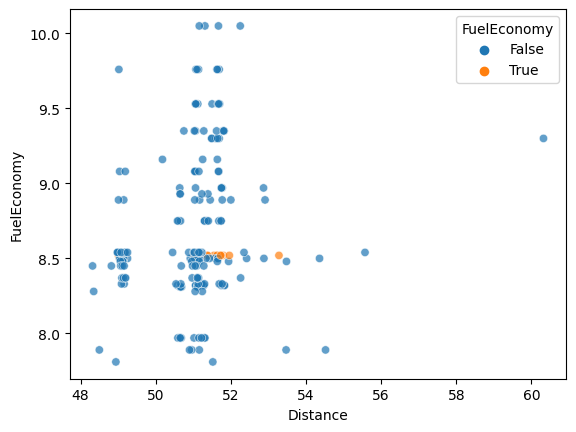

In [159]:
plt.figure()
# TODO set data kwarg to be the imputed dataframe you have just generated
sns.scatterplot(data=data_simp, x='Distance', y='FuelEconomy', 
            hue=na_mask, alpha=0.7)

## E) Iterative imputer w/ linear model 

With MAR data, stochastic regression is a better imputation alternative. 
Here you need to decide:
1. which variables are going to participate in the regression;
2. which model you are going to use (linear or something else)


In this exercise, we'll use a linear model (namely a [Bayesian Ridge regression](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression), the default model proposed by `sklearn`'s `IterativeImpute`.)
We will inlcude `Distance` in the modeling since it seems to be the only factor conditioning the MAR mechanism. In the case of a linear model, Other variables might be significantly correlated.



**TODO** Check the correlation between observed values in `FuelEconomy` and other columns. Select variables  with significant correlation to be part of the model

In [160]:
# Compute correlation and p-values
# TODO your code here
correlations_with_pvalues = {}
for column in data_simp.columns:
    if column == 'FuelEconomy':
        continue
    correlation, p_value = kendalltau(data_simp.loc[data['FuelEconomy'].notnull(), column], data_simp.loc[data['FuelEconomy'].notnull(), 'FuelEconomy'])
    correlations_with_pvalues[column] = {'correlation': correlation, 'p-value': p_value}

# Create correlations dataframe
correlations_df = pd.DataFrame(correlations_with_pvalues).T.astype(float)
correlations_df.sort_values('correlation', ascending=False, inplace=True)

correlations_df

,correlation,p-value
MovingTime,0.162571,0.001354
Distance,0.158170,0.001813
TotalTime,0.143649,0.004604
DayOfWeek,0.010826,0.844849
GoingTo,0.002948,0.961870
MaxSpeed,-0.025517,0.614992
AvgSpeed,-0.101346,0.045261
AvgMovingSpeed,-0.134940,0.007709
Take407All,-0.298042,0.000001


In [161]:
# Select significant variables
# TODO your code here
significant_variables = correlations_df[correlations_df['p-value'] < 0.05].index.tolist()
significant_variables.append('FuelEconomy')
significant_variables


['MovingTime',
 'Distance',
 'TotalTime',
 'AvgSpeed',
 'AvgMovingSpeed',
 'Take407All',
 'FuelEconomy']

### Applying `IterativeImputer`

`IterativeImputer` can be used to perform stochastic regression. Complete the code bellow in order to impute `FuelEconomy` missing values. Keep the imputed data as a separate dataframe for later comparisons.

**NOTE** Fix a random state on the `IterativeImputer` object so you can reproduce the results. Change the random state to see how different values get imputet each time.

In [162]:
# # TODO select only the columns you deemed significant and save them in data_ref
# # TODO use data_ref to fit the imputation model and impute the missing values in FuelEconomy.
# # TODO your code here

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
data_ref = data[significant_variables]
imp = IterativeImputer(BayesianRidge(), random_state=0)
imp.fit(data_ref)
data_brimp = pd.DataFrame(imp.transform(data_ref), index=data_ref.index, columns=data_ref.columns)

data_brimp['FuelEconomy']



Date_StartTime
2012-01-06 16:37:00-06:00    8.682796
2012-01-06 08:20:00-06:00    8.639282
2012-01-04 16:17:00-06:00    8.723891
2012-01-04 07:53:00-06:00    8.557418
2012-01-03 18:57:00-06:00    8.668758
                               ...   
2011-07-18 08:09:00-06:00    7.890000
2011-07-14 08:03:00-06:00    7.890000
2011-07-13 17:08:00-06:00    8.495371
2011-07-12 17:51:00-06:00    8.293236
2011-07-11 16:56:00-06:00    8.103337
Name: FuelEconomy, Length: 205, dtype: float64

Observe the effect of this imputation in the relationship between `FuelEconomy` and `Distance`.


**QUESTION: what is the main difference observed with respect to the median imputation method?**

>*We can see that the result using Iterative Imputer method is more varied than the result using median imputation method. This means that the iterative imputation method may provide more accurate and representative results, especially when there are complex relationships in the data.*

<Axes: xlabel='Distance', ylabel='FuelEconomy'>

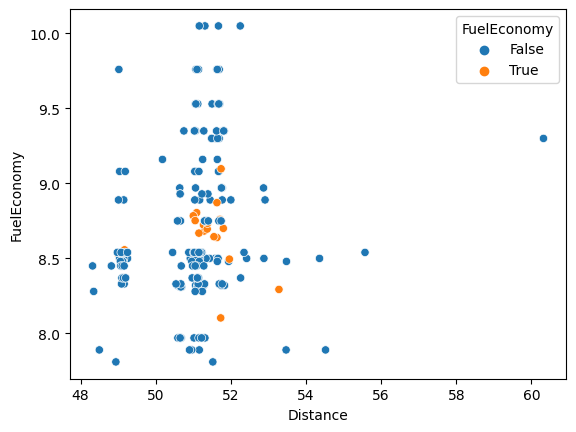

In [163]:
plt.figure()
sns.scatterplot(data=data_brimp, x='Distance', y='FuelEconomy', hue=na_mask)

## F) Iterative imputer w/ non-linear model
In this exercise, we'll use again `IterativeImputer`, but this time with a non-linear model ([`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)). In this model we'll include all columns of the dataframe. Keep the imputed data as a separate dataframe for later comparisons.

In [164]:
# TODO use data to fit the imputation model and impute the missing values in FuelEconomy.
from sklearn.ensemble import RandomForestRegressor
# NOTE sklearn returns a numpy array. You should reformat its output as a dataframe with the same index and columns as before.
imp_rf = IterativeImputer(estimator=RandomForestRegressor(random_state=0),random_state=0)
imp_rf.fit(data)
data_rfimp = pd.DataFrame(
    # TODO complete the line bellow
    imp_rf.transform(data),
    index=data.index,
    columns=data.columns
    )
data_rfimp['FuelEconomy']

Date_StartTime
2012-01-06 16:37:00-06:00    8.6438
2012-01-06 08:20:00-06:00    8.9903
2012-01-04 16:17:00-06:00    8.7283
2012-01-04 07:53:00-06:00    8.6338
2012-01-03 18:57:00-06:00    8.4909
                              ...  
2011-07-18 08:09:00-06:00    7.8900
2011-07-14 08:03:00-06:00    7.8900
2011-07-13 17:08:00-06:00    8.5274
2011-07-12 17:51:00-06:00    8.4348
2011-07-11 16:56:00-06:00    8.5033
Name: FuelEconomy, Length: 205, dtype: float64

Observe the effect of this imputation in the relationship between `FuelEconomy` and `Distance`.

<Axes: xlabel='Distance', ylabel='FuelEconomy'>

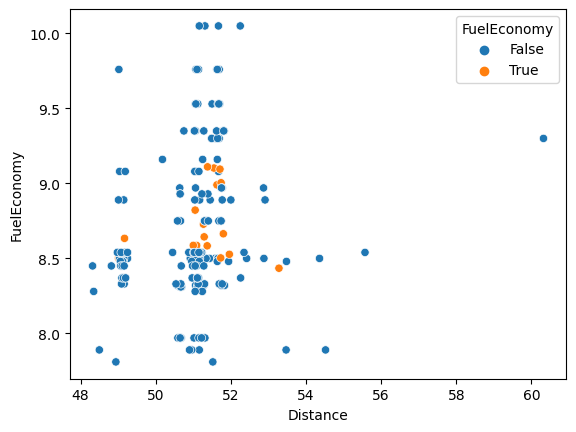

In [165]:
plt.figure()
sns.scatterplot(data=data_rfimp, x='Distance', y='FuelEconomy', hue=na_mask)

## G) Compare
Complete the dataframe bellow with the several imputed `FuelEconomy` series you have obtained in exercises D, E and F. The first column in the dataframe is the original data with NA, and will be used to compute statistics in a pairwise fashion (i.e. available case analysis, ACA).

We'll compare some of their statistics to see how different imputations can affect them.


,Ignore NA (ACA),MedianImpute,IterativeImpute BR,IterativeImpute RF
count,186.000000,205.000000,205.000000,205.000000
mean,8.690591,8.674780,8.687729,8.696517
std,0.504971,0.483431,0.485053,0.487728
min,7.810000,7.810000,7.810000,7.810000
25%,8.370000,8.370000,8.370000,8.370000
50%,8.520000,8.520000,8.540000,8.540000
75%,8.970000,8.930000,8.930000,8.970000
max,10.050000,10.050000,10.050000,10.050000


Text(0.5, 1.0, 'Distribution of FuelEconomy')

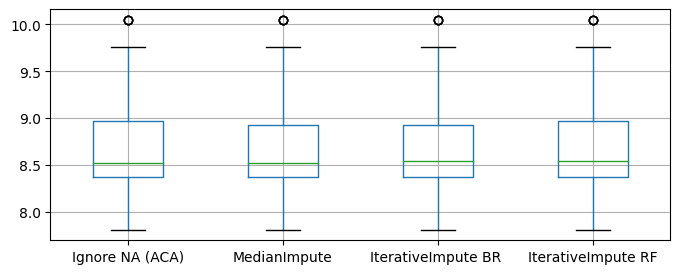

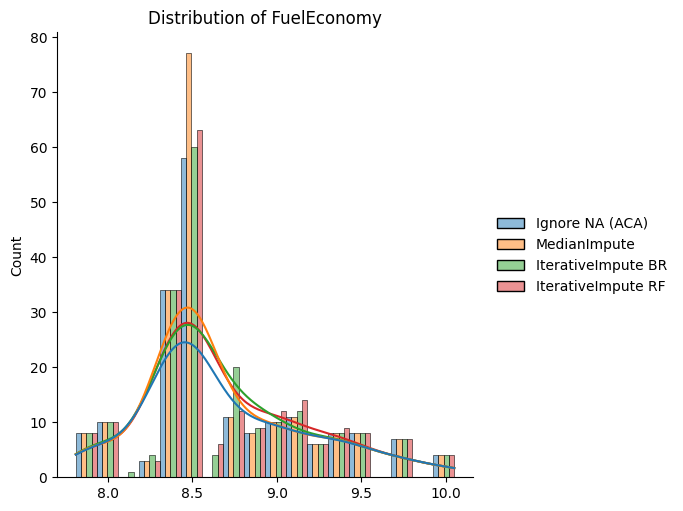

In [147]:
# TODO complete the dataframe bellow

data = pd.DataFrame({
    'Ignore NA (ACA)': data['FuelEconomy'],
    'MedianImpute': data_simp['FuelEconomy'],
    'IterativeImpute BR ': data_brimp['FuelEconomy'],
    'IterativeImpute RF': data_rfimp['FuelEconomy'],
    'imputed': na_mask},
    index=data.index
    )
# Now we display tables, boxplots and histograms
display(data.describe())
data.drop('imputed', axis=1).boxplot(figsize=(8,3))

sns.displot(data.drop('imputed', axis=1), kde=True, multiple='dodge')
plt.title('Distribution of FuelEconomy')

Text(0.5, 1.0, 'Kendall Correlation between FuelEconomy and other columns')

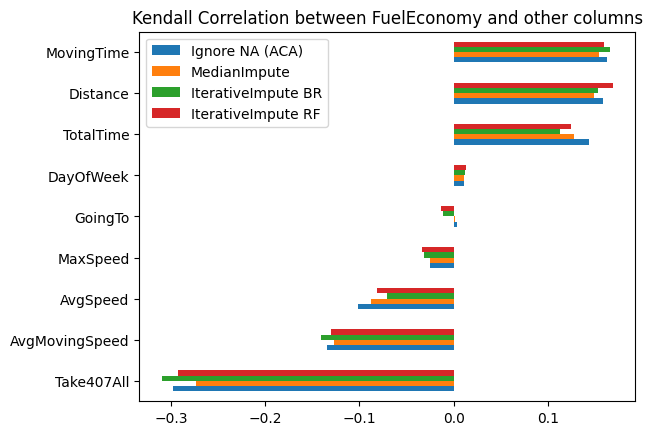

In [166]:
data = pd.DataFrame(
    {'Ignore NA (ACA)': (
        data.corr(method='kendall')['FuelEconomy']
            .drop(index=['FuelEconomy'])
            .sort_values()),
     'MedianImpute': (
        data.corrwith(data_simp['FuelEconomy'], method='kendall')
            .drop('FuelEconomy', axis=0)
    ),
        'IterativeImpute BR':
        (data.corrwith(data_brimp['FuelEconomy'], method='kendall')
            .drop('FuelEconomy', axis=0)
         ),
        'IterativeImpute RF':
        (data.corrwith(data_rfimp['FuelEconomy'], method='kendall')
            .drop('FuelEconomy', axis=0)
         )
    }
)
data.sort_values(by='Ignore NA (ACA)').plot.barh()
plt.title('Kendall Correlation between FuelEconomy and other columns')


**OPEN QUESTION** Discuss the comparative plots obtained above.

>*From the Kendall Correlation plot, we can see that on almost all variables, although the values are different, the correlations (positive and negative) shown by the four methods are largely different, but on the variable GoingTo, IterativeImpute BR and RF show a negative correlation, while Ignore NA and Median Impute showed a positive correlation, which may be due to the difference in handling missing values between Iterative impute and several other methods. This may also be the reason why the average line of IterativeImpute is higher than the other two methods in boxplot. We can see that in displot, median impute is much higher than the other methods when located at 8.5. This is because the median impute method replaces missing values with medians, so the count value is much higher when the median of fuel economy is close to 8.5. The Iterative at position 8.75 impute BR does the same thing because it takes into account the patterns and relationships in the data. In this approach, each missing value is estimated based on the values of the other variables. Thus, if there are more missing values in the FuelEconomy observations near 8.75, then the iterative interpolation method may estimate more such values, resulting in a distribution with a higher peak around this value.*